## libraries

In [56]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

# plotting options
%matplotlib inline
sns.set_style('whitegrid')

# for model tuning & fitting
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.model_selection import GridSearchCV

## import data

In [57]:
train0 = pd.read_csv("train.csv")
test0 = pd.read_csv("test.csv")

In [58]:
test0.head(5)

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S


In [59]:
train0.info();

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
PassengerId    891 non-null int64
Survived       891 non-null int64
Pclass         891 non-null int64
Name           891 non-null object
Sex            891 non-null object
Age            714 non-null float64
SibSp          891 non-null int64
Parch          891 non-null int64
Ticket         891 non-null object
Fare           891 non-null float64
Cabin          204 non-null object
Embarked       889 non-null object
dtypes: float64(2), int64(5), object(5)
memory usage: 83.6+ KB


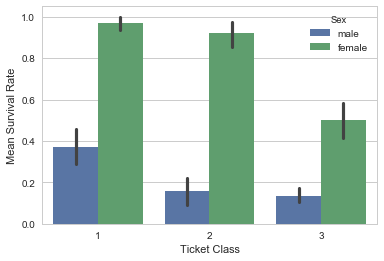

In [60]:
plot = sns.barplot(x="Pclass",y="Survived",hue="Sex",data=train0);
plt.xlabel('Ticket Class')
plt.ylabel('Mean Survival Rate')
#plt.savefig("titanicbarplot1.svg", bbox_inches='tight')

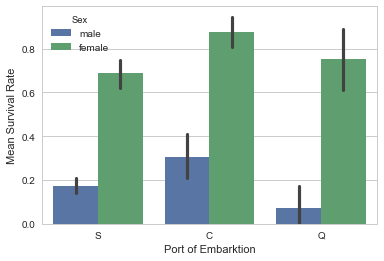

In [61]:
plot = sns.barplot(x="Embarked",y="Survived",hue="Sex",data=train0);
plt.xlabel('Port of Embarktion')
plt.ylabel('Mean Survival Rate')
#plt.savefig("titanicbarplot2.svg", bbox_inches='tight')

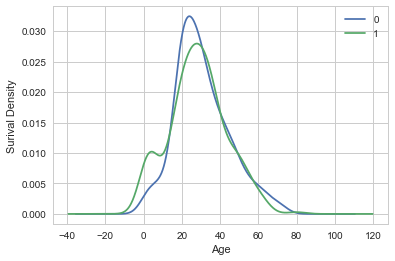

In [62]:
train0.groupby(train0.Survived)['Age'].plot(kind='density',legend=True);
plt.xlabel('Age')
plt.ylabel('Surival Density')
#plt.savefig("titanicdensity1.svg", bbox_inches='tight')

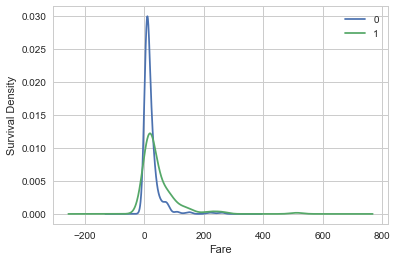

In [63]:
train0.groupby(train0.Survived)['Fare'].plot(kind='density',legend=True);
plt.xlabel('Fare')
plt.ylabel('Survival Density')
#plt.savefig("titanicdensity2.svg", bbox_inches='tight')

## Feature engineering

In [64]:
datalist = [train0,test0]
alldata0 = pd.concat(datalist)

In [65]:
alldata0.shape

(1309, 12)

In [66]:
alldata0['title'] = alldata0.Name.str.extract(' ([A-Za-z]+)\.', expand=False)

In [67]:
alldata0.head()

,Age,Cabin,Embarked,Fare,Name,Parch,PassengerId,Pclass,Sex,SibSp,Survived,Ticket,title
0,22.0,NaN,S,7.2500,"Braund, Mr. Owen Harris",0,1,3,male,1,0.0,A/5 21171,Mr
1,38.0,C85,C,71.2833,"Cumings, Mrs. John Bradley (Florence Briggs Th...",0,2,1,female,1,1.0,PC 17599,Mrs
2,26.0,NaN,S,7.9250,"Heikkinen, Miss. Laina",0,3,3,female,0,1.0,STON/O2. 3101282,Miss
3,35.0,C123,S,53.1000,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",0,4,1,female,1,1.0,113803,Mrs
4,35.0,NaN,S,8.0500,"Allen, Mr. William Henry",0,5,3,male,0,0.0,373450,Mr


In [68]:
alldata0.groupby('title').size()

title
Capt          1
Col           4
Countess      1
Don           1
Dona          1
Dr            8
Jonkheer      1
Lady          1
Major         2
Master       61
Miss        260
Mlle          2
Mme           1
Mr          757
Mrs         197
Ms            2
Rev           8
Sir           1
dtype: int64

In [69]:
alldata0['title'] = alldata0['title'].replace(['Mme','Lady','Countess','Capt','Col','Don'\
                                             ,'Dr','Major','Rev','Sir','Jonkheer','Dona'],'Rare')

In [70]:
alldata1 = alldata0.drop(["Ticket","Name","Cabin"],1,)

In [71]:
alldata1.head()

,Age,Embarked,Fare,Parch,PassengerId,Pclass,Sex,SibSp,Survived,title
0,22.0,S,7.2500,0,1,3,male,1,0.0,Mr
1,38.0,C,71.2833,0,2,1,female,1,1.0,Mrs
2,26.0,S,7.9250,0,3,3,female,0,1.0,Miss
3,35.0,S,53.1000,0,4,1,female,1,1.0,Mrs
4,35.0,S,8.0500,0,5,3,male,0,0.0,Mr


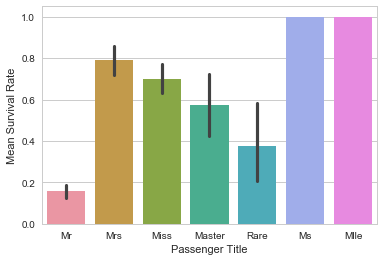

In [72]:
plotthis = alldata1[~alldata1.Survived.isnull()]
plot = sns.barplot(x="title",y="Survived",data=plotthis);
plt.xlabel('Passenger Title')
plt.ylabel('Mean Survival Rate');
#plt.savefig("titanicbarplot3.svg", bbox_inches='tight')

In [73]:
alldata1['title'] = alldata1['title'].map({"Mr": 1, "Miss": 2, "Mrs": 3, "Master": 4, "Rare": 5})
alldata1['title'] = alldata1['title'].fillna(0)

alldata1['Sex'] = alldata1['Sex'].map({"male": 1, "Female": 2})
alldata1['Sex'] = alldata1['Sex'].fillna(0)

alldata1["Embarked"] = alldata1['Embarked'].map({"S": 1, "C": 2, "Q": 3})
alldata1['Embarked'] = alldata1['Embarked'].fillna(0)

alldata1['Age'] = alldata1['Age'].fillna(0)
alldata1['Fare'] = alldata1['Fare'].fillna(0)

In [74]:
alldata1.shape

(1309, 10)

In [75]:
# split test and train
train1 = alldata1[~alldata1.Survived.isnull()].drop("PassengerId",1)
test1 = alldata1[alldata1.Survived.isnull()]

# split features and response
X = train1.drop("Survived",1)
Y = train1["Survived"]
testX = test1.drop(['Survived','PassengerId'],1)

## gradient boosted random forest with shrinkage and subsampling

In [76]:
params = {'n_estimators':range(300,1201,100),
         'learning_rate':[0.1,0.05,0.02],
          'max_depth':[2,3],
          'max_features':[3,4,5]}

grdsearch = GridSearchCV(estimator=GradientBoostingClassifier(),
                         param_grid=params,
                         scoring='accuracy',
                         iid=False,
                         cv=3)

In [77]:
searchresults = grdsearch.fit(X,Y)

In [78]:
print("Best score acheived is:",searchresults.best_score_)
print("Best grid parameters for this score are:")
print(searchresults.best_params_)

Best score acheived is: 0.842873176207
Best grid parameters for this score are:
{'learning_rate': 0.1, 'max_depth': 3, 'max_features': 3, 'n_estimators': 300}


In [94]:
gbc = GradientBoostingClassifier(n_estimators=300,
                                 learning_rate=0.1,
                                 max_depth=3,
                                 max_features=3)

In [95]:
model = gbc.fit(X,Y)

In [96]:
survival_prediction = model.predict(testX).astype('int').astype('str')
survival_id = test1['PassengerId']

In [97]:
# Generate Submission File 
submitFile = pd.DataFrame({ 'PassengerId': survival_id,
                            'Survived': survival_prediction })
submitFile.to_csv("titanicsubmission.csv", index=False)

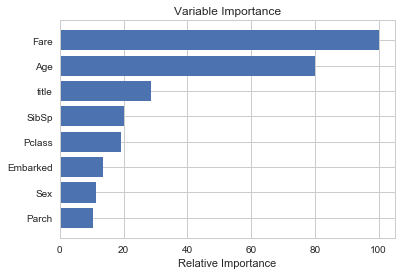

In [98]:
feature_importance = model.feature_importances_
# make importances relative to max importance
feature_importance = 100.0 * (feature_importance / feature_importance.max())
sorted_idx = np.argsort(feature_importance)
pos = np.arange(sorted_idx.shape[0]) + .5
plt.barh(pos, feature_importance[sorted_idx], align='center')
plt.yticks(pos, X.columns.values[sorted_idx])
plt.xlabel('Relative Importance')
plt.title('Variable Importance')
plt.savefig("titanicImportance.svg")